In [182]:
# Importação e configuração
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE # Para utilizar o imblearn o scikit-learn precisa estar na versão 1.2.2

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

pd.options.display.float_format = '{:.2f}'.format
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.marker'] = 'o'
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.markerfacecolor'] = 'blue'
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markeredgecolor'] = 'black'

In [183]:
# Carregando arquivo Csv
df = pd.read_csv('base_case.csv', sep='\t')

# Avaliando o conjunto de dados de forma macro

In [184]:
# Visualizar os Primeiros Registros
df.head()

,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO
0,0,0,2023-01-31,CREDITO PESSOAL,52,2461.11,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.00,0.00,2.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,7,44.65,7.65,44.65,7.65,NaN,NaN,18.50,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,NaN,NaN,NaN,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,0.00,NaN,0.00,0.00,NaN,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,S,N,44.65,NaN,N,N,VAREJO,S,35.70,N,VAREJO-BANCOS,N,NaN,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,0,0,0,0,0,2,NaN,MEDIO,NaN,3.00,-1.00,1.00,URBANO,NORTE
1,1,0,2022-12-29,CREDITO PESSOAL,37,4674.50,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,7,41.61,15.47,41.61,15.47,31.82,30.66,6.50,0.60,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,NaN,NaN,0.67,0.67,NaN,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,S,S,15.47,30.66,N,N,VAREJO,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE
2,2,0,2023-09-29,CREDITO PESSOAL,36,43649.17,30 a 60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,69.55,0.82,69.55,0.82,50.62,50.62,4.00,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,1.00,NaN,NaN,1.00,NaN,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,S,S,0.82,50.62,S,N,BANCOS,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMPLETO,ALTO,1,4.00,1,0,1,D,0,NaN,NaN,

In [185]:
# Verificando quantidade de linhas e colunas
df.shape

(46522, 203)

In [186]:
# Resumo Estatístico dos Dados
df.describe()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_150,col_151,col_156,col_160,col_164,col_165,col_166,col_167,col_169,col_170,col_173,col_174,col_175,col_176,col_177,col_179,col_182,col_183,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_197,col_198,col_199
count,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,42989.00,42989.00,41712.00,41712.00,14311.00,14311.00,37003.00,11520.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,20881.00,22587.00,18812.00,34945.00,10828.00,30530.00,11692.00,19311.00,3302.00,46522.00,46522.00,46522.00,45979.00,40402.00,46522.00,46522.00,45979.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,42393.00,42374.00,43038.00
mean,23260.50,0.13,45.23,5705.32,0.27,0.00,0.00,0.00,0.02,0.14,0.00,0.00,0.17,0.60,0.01,0.00,0.00,0.03,0.27,0.00,0.00,0.30,1.10,0.01,0.00,0.00,0.06,0.53,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,1.20,2.21,0.87,2.01,4.35,7.69,0.29,0.63,1.31,2.59,0.18,0.51,1.26,2.16,0.40,0.87,1.77,2.94,0.23,0.47,1.02,2.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.52,0.74,0.00,0.19,0.41,0.01,0.34,0.02,0.00,0.01,0.02,0.73,0.00,0.27,0.01,0.00,0.00,0.01,0.17,0.72,4.43,46.18,8.67,43.58,10.25,36.27,14.15,7.28,5.28,2.64,0.68,0.01,0.03,5.04,3.09,0.81,0.01,0.03,5.64,3.80,1.07,0.01,0.04,6.65,0.20,0.59,0.62,0.49,0.64,10.13,14.87,3.57,8.01,0.32,0.00,0.04,0.07,0.26,0.17,0.22,0.75,0.12,0.00,0.54,0.07,0.00,0.02,0.41,0.09,0.04,0.19,0.00,0.00,2.43,2.94,-0.80,0.69
std,13429.89,0.33,8.36,14505.09,0.62,0.06,0.00,0.01,0.13,0.60,0.00,0.03,0.51,0.97,0.09,0.00,0.01,0.18,0.82,0.00,0.04,0.69,1.31,0.11,0.01,0.05,0.23,1.23,0.01,0.05,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.14,1.67,2.35,2.99,4.97,8.62,13.94,1.52,2.14,3.47,6.58,0.66,1.28,2.39,3.33,2.29,3.80,6.47,10.08,1.05,1.65,2.79,5.46,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.07,0.44,0.50,0.44,0.00,0.39,0.49,0.11,0.47,0.14,0.00,0.11,0.14,0.45,0.06,0.44,0.08,0.00,0.00,0.08,0.38,0.45,2.75,24.28,11.69,24.82,13.24,20.63,15.26,9.55,6.62,2.15,1.24,0.08,0.17,3.36,2.60,1.49,0.08,0.18,3.90,3.17,1.95,0.09,0.20,4.66,0.34,0.43,0.39,0.38,0.37,1

In [187]:
# Verificar o tipo de dados de cada variável
df.dtypes

index            int64
alvo             int64
REF_DATE        object
PRODUTO         object
DIAS_ATRASO      int64
                ...   
col_197        float64
col_198        float64
col_199        float64
col_200         object
REGIAO          object
Length: 203, dtype: object

In [188]:
# Verificando quantidade de cada tipo dentro do dataframe 
df.dtypes.value_counts()

int64      103
float64     52
object      48
Name: count, dtype: int64

In [189]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 203 entries, index to REGIAO
dtypes: float64(52), int64(103), object(48)
memory usage: 72.1+ MB


# Pré-Processamento

#### Passos que foram seguidos:
- Agrupamento de dados
- Remoção
- Binarização de dados
- Padronização

  ### Lidando com dados vazios e nulos

In [190]:
# Mapeamento para criar a nova coluna 'alvo_label'
mapeamento_descricao = {1: 'Mau Pagador', 0: 'Bom Pagador'}

# Aplicando o mapeamento para criar a nova coluna 'alvo_label'
df['alvo_label'] = df['alvo'].map(mapeamento_descricao)

In [191]:
# Verificando a presença de dados nulos
df.isnull().sum()

index             0
alvo              0
REF_DATE          0
PRODUTO           0
DIAS_ATRASO       0
               ... 
col_198        4148
col_199        3484
col_200        4859
REGIAO         4653
alvo_label        0
Length: 204, dtype: int64

In [192]:
# Lista de colunas que irão ser dividas
columns = ['col_162', 'col_163']
suffixes = {'col_162': '', 'col_163': '_1'}

# Para cada coluna selecionada o codigo vai executar o loop
for column in columns:
    # Separando a coluna com chave e valor
    split_data = df[column].str.split(' - ')
    
    # Definição das novas colunas
    aprov = []
    novasolic = []
    solicmesmolocal = []
    
    # Interando os valores em suas respectivas colunas 
    for row in split_data:
        for item in row:
            key, value = item.split(':')
            if key == 'APROV':
                aprov.append(value)
            elif key == 'NOVASOLIC':
                novasolic.append(value)
            elif key == 'SOLICMESMOLOCAL':
                solicmesmolocal.append(value)
    
    # Criando novo dataframe com os dados extraidos do loop
    new_df = pd.DataFrame({'APROV' + suffixes[column]: aprov, 
                               'NOVASOLIC' + suffixes[column]: novasolic, 
                               'SOLICMESMOLOCAL' + suffixes[column]: solicmesmolocal})
            
    # Concatenando os novos dados  
    df = pd.concat([df, new_df], axis=1)

# Removendo as colunas com dados aglutinados
df.drop(columns=columns, inplace=True)

In [193]:
# Removendo colunas que só tem um valor unico
for column in df.columns.tolist():
    unique_count = df[column].nunique()
    if unique_count == 1:
        df = df.drop(columns=column)

In [194]:
# Agrupamentos junto com as instruções do proximo passo a ser feito com os dados

cols_clear_obj = [] # Prontos para fazer OHE 
cols_not_clear_obj = [] # Tratar para poder fazer o OHE

cols_clear_float = [] # Prontos para o modelo
cols_not_clear_float = [] # Tratar para o modelo

cols_clear_int = [] # Prontos para o modelo
cols_not_clear_int = []  # Tratar para o modelo

cols_to_remove = []  # Dados que nao vai afetar siginifcativamente o mdoelo
cols_bin = []

for col in df.columns:
   
    null_count = df[col].isnull().sum()
    
    # Agrupando dados com mais de 50% de dados nulos
    if (df[col].isnull().sum() / df.shape[0]) * 100 > 50:
        cols_to_remove.append(col)
        continue
        
    # Agrupando dados limpos binarios
    if df[col].nunique() == 2 and df[col].dtype == 'O':
        cols_bin.append(col)
        
    # Agrupando dados limpos que são do tipo objeto
    if null_count == 0 and df[col].dtype == 'object':
        cols_clear_obj.append(col)

    # Agrupando dados sujos do tipo objeto
    elif null_count > 0 and df[col].dtype == 'object':
        cols_not_clear_obj.append(col)
        
    # Agrupando dados limpos que são do tipo float64
    if null_count == 0 and df[col].dtype == 'float64':
        cols_clear_float.append(col)
    # Agrupando dados sujos do tipo float64
    elif null_count > 0 and df[col].dtype == 'float64':
        cols_not_clear_float.append(col)
        
    # Agrupando dados limpos que são do tipo int64
    if null_count == 0 and df[col].dtype == 'int64':
        cols_clear_int.append(col)
    # Agrupando dados sujos do tipo int64
    elif null_count > 0 and df[col].dtype == 'int64':
        cols_not_clear_int.append(col)

In [195]:
# Mapeamento para binarizar 'S' como 1 e 'N' como 0
mapeamento_binarizacao = {'S': 1, 'N': 0}
cols_bin.remove('alvo_label')
# Aplicando a binarização às colunas
for col in cols_bin:
        df[col] = df[col].map(mapeamento_binarizacao)

### Removendo Colunas

- Colunas que tem mais de 50% de dados ausentes
- removendo colunas com valor unico

In [196]:
# Remoção de dados que tem mais de 27 mil de vazios (aproximadamente 50% de dados nulos)
df = df.drop(columns=cols_to_remove)

In [197]:
# Preenchendo valores nulos em colunas do tipo objeto com 'INDEFINIDO'
df[cols_not_clear_obj] = df[cols_not_clear_obj].fillna('INDEFINIDO')

# Preenchendo valores nulos em colunas do tipo int64 com a média
for col in cols_not_clear_int:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Preenchendo valores nulos em colunas do tipo float64 com a média
for col in cols_not_clear_float:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Analise Exploratoria
Diferente da analise em macro, aqui irei criar graficos e trazer dados mais especificos.

## Visualização de frequência de bom e mal pagador ao longo do tempo
Como vi limitações no meu modelo em relação ao uso de data para fazer as previsões, achei justo mostrar uma visualização da serie historica da frequencia do bom e mal pagador.

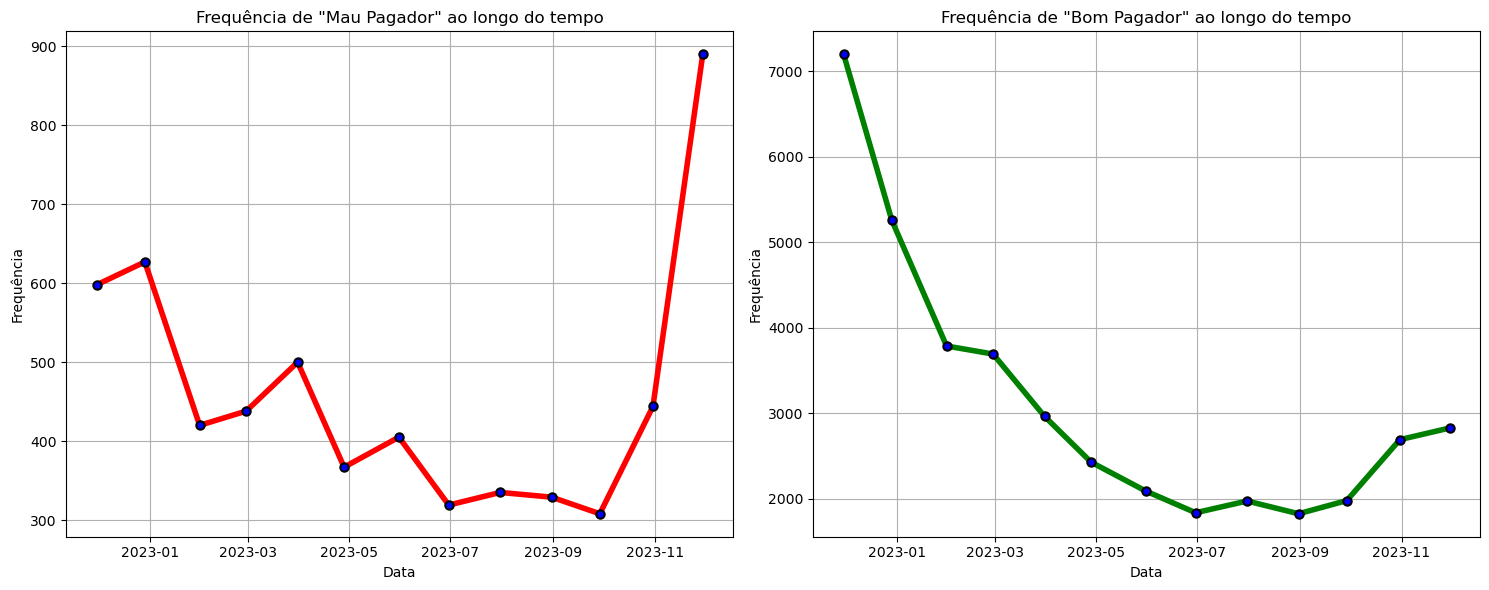

In [198]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'REF_DATE' para o formato de data
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Agrupando os dados por 'REF_DATE' e contando a frequência de 'Mau Pagador' e 'Bom Pagador'
frequencia_mau_pagador = df[df['alvo_label'] == 'Mau Pagador'].groupby('REF_DATE').size()
frequencia_bom_pagador = df[df['alvo_label'] == 'Bom Pagador'].groupby('REF_DATE').size()

# Criando uma figura com dois subgráficos (lado a lado)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de "Mau Pagador"
axes[0].plot(frequencia_mau_pagador, color='red')
axes[0].set_title('Frequência de "Mau Pagador" ao longo do tempo')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Gráfico de "Bom Pagador"
axes[1].plot(frequencia_bom_pagador, color='green')
axes[1].set_title('Frequência de "Bom Pagador" ao longo do tempo')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [199]:
# Removendo 'alvo_label' que serviu apenas para criar uma descrição e 'REF_DATE' que foi utilizado para visualizar a Serie Historica
df = df.drop(columns=['REF_DATE','alvo_label'])

# Correlação com V de Cramer

Ao explorar a relação entre variáveis categóricas, é essencial complementar análises visuais com métodos estatísticos. A medida de associação, especialmente entre variáveis nominais ou ordinais, pode ser avaliada de diversas maneiras. Uma abordagem comum é o uso do coeficiente V de Cramer, que varia de 0 a 1 e indica a intensidade da associação da seguinte forma:

- **V > 0.7**: associação alta
- **0.7 ⩾ V > 0.3**: associação moderada
- **0.3 ⩾ V > 0.1**: associação baixa
- **0.1 ⩾ V > 0**: associação nula

O coeficiente V de Cramer é calculado pela fórmula:

$ V = \sqrt{\frac{\chi^{2}/n}{min(k-1,r-1)}} $$

Onde:

- \(\chi^2\): estatística qui-quadrado relacionada à tabela de contingência
- \(n\): soma de todas as células da tabela de contingência
- \(k\): número de colunas na tabela de contingência
- \(r\): número de linhas na tabela de contingência

Para calcular o V de Cramer, podemos utilizar a função chi2_contingency do módulo stats.


In [200]:
from scipy import stats

def vcramer(data):
  #Chi-squared test statistic, sample size, and minimum of rows and columns
  X2 = stats.chi2_contingency(data, correction=False)[0]
  n = np.sum(data)
  minDim = min(data.shape)-1
  
  #calculate Cramer's V 
  V = np.sqrt((X2/n) / minDim)

  return V

In [201]:
def create_df_cramer():
    drop_to_v_cramer = ['DIAS_ATRASO']
    for c in df.columns.tolist():
        count = df[c].nunique()
        # Verifica se a coluna não é categórica e adiciona se tiver mais de 50 valores únicos
        if df[c].dtype != 'O' and count > 50:
            drop_to_v_cramer.append(c)

    # Criar o DataFrame para fazer a correlação do V de Cramer sem as colunas continuas
    return df.drop(columns=drop_to_v_cramer)

In [202]:
df_cramer = create_df_cramer()

In [203]:
# Visualizando dados do DataFrame apenas com dados possivelmente categoricos
df_cramer.head()

,alvo,col_6,col_7,col_9,col_10,col_11,col_13,col_14,col_15,col_16,col_18,col_19,col_20,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_48,col_49,col_50,col_55,col_56,col_59,col_60,col_61,col_62,col_67,col_68,col_69,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_91,col_92,col_93,col_94,col_95,col_97,col_98,col_99,col_100,col_101,col_102,col_105,col_106,col_107,col_108,col_117,col_118,col_119,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_152,col_153,col_154,col_155,col_157,col_159,col_161,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_182,col_183,col_184,col_185,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO,APROV,NOVASOLIC,SOLICMESMOLOCAL,APROV_1,NOVASOLIC_1,SOLICMESMOLOCAL_1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,7,INDEFINIDO,INDEFINIDO,INDEFINIDO,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,1,0,0,0,VAREJO,1,0,0,0,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,0,0,DE 25 A 39 ANOS,Y,0,0,0,0,0,0,2,INDEFINIDO,MEDIO,INDEFINIDO,3.00,-1.00,1.00,URBANO,NORTE,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,7,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,1,1,0,0,VAREJO,0,0,0,0,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,0,0,DE 25 A 39 ANOS,Y,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,5,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,1,1,1,0,BANCOS,0,0,0,0,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMPLETO,ALTO,1,4.00,1,0,1,D,0,0,0,DE 40 A 59 ANOS,X,0,0,1,1,0,0,8,B,MUITO ALTO,B+,4.00,3.00,1.00,URBANO,SUDESTE,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,A,A,A,B,A,A,B,B,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,INDEFINIDO,INDEFINIDO,INDEFINIDO,1,0,0,0,3,1,0,0,0,3,1,1,0,0,4,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,1,0,0,0,FINANCEIRAS,0,0,0,0,0,0,0,0.00,INDEFINIDO,0.00,0,INDEFINIDO,INDEFINIDO,0,0.00,0,0,0,E,0,0,0,DE 40 A 59 ANOS,X,1,0,0,1,0,0,1,C,BAIXO,C-,4.00,-4.00,0.00,URBANO,SUDESTE,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,B,B,A,A,A,A,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,INDEFINIDO,INDEFINIDO,INDEFINIDO,0,0,0,0,2,0,0,0,0,2,1,0,0,0,3,SEM PASSAGEM,SEM PASSAGEM,ALTA,ALTA,SEM PASSAGEM,1,0,1,0,VAREJO,0,0,0,0,0,0,0,0.00,2 A 4 SM,0.00,0,INDEFINIDO,INDEFINIDO,0,3.00,1,0,1,E,0,0,0,DE 25 A 39 ANOS,Y,0,0,0,0,0,0,3,C,MEDIO,C,4.00,-1.00,1.00,URBANO,SUDESTE,1,0,0,0,0,0


In [204]:
%%time
high_corr = []

colunas = df_cramer.columns.tolist()
pares = [(col1, col2) for idx, col1 in enumerate(colunas) for col2 in colunas[idx + 1:]]

for col1, col2 in pares:
    v = vcramer(pd.crosstab(df_cramer[col1], df_cramer[col2]).to_numpy())
    if v > 0.7:
        high_corr.append({col1, col2})

CPU times: total: 50.9 s
Wall time: 1min 8s


In [205]:
removed_items = set()  # Conjunto para armazenar os itens removidos

# Itera sobre cada par na lista
for pair in high_corr:
    if len(pair) > 1:  # Limita a busca apenas aos pares que têm mais de 1 item
        first_item = next(iter(pair))  # Separa o primeiro item do par

        # Itera sobre todos os pares novamente para remover first_item
        for other_pair in high_corr:
            if first_item in other_pair:  # Se o first_item existir no par que está sendo verificado
                other_pair.remove(first_item)  # Remove o first_item do par
                removed_items.add(first_item)  # Adiciona o first_item ao conjunto de itens removidos

# Remove as colunas do DataFrame correspondentes aos itens removidos
df = df.drop(columns=list(removed_items))

In [206]:
# Atualizando o df_cramer removendo as colunas que já foram removidas.
df_cramer = create_df_cramer()

# One-Hot-Encoder

In [207]:
df.head()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_10,col_13,col_14,col_15,col_18,col_23,col_24,col_25,col_26,col_27,col_28,col_30,col_31,col_32,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_69,col_70,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_86,col_91,col_93,col_94,col_95,col_97,col_98,col_100,col_102,col_106,col_107,col_109,col_110,col_111,col_112,col_115,col_118,col_125,col_128,col_129,col_133,col_134,col_141,col_143,col_144,col_145,col_146,col_147,col_150,col_154,col_157,col_161,col_164,col_165,col_166,col_167,col_168,col_170,col_171,col_175,col_176,col_179,col_182,col_183,col_185,col_188,col_191,col_192,col_193,col_196,col_197,col_198,col_199,col_200,REGIAO,NOVASOLIC,NOVASOLIC_1
0,0,0,52,2461.11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,0.00,0.00,2.00,2.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,A,A,C,C,A,A,A,1,0,0,0,0,0,0,0,1,1,44.65,7.65,44.65,7.65,18.50,INDEFINIDO,0,4,0,6,0,0.00,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,44.65,VAREJO,0,0,0,0,0,0.00,SEM INFORMACAO,0,FUNDAMENTAL COMPLETO,0,0,0,0,0,Y,0,0,0,2,INDEFINIDO,3.00,-1.00,1.00,URBANO,NORTE,1,0
1,1,0,37,4674.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,A,A,A,C,A,A,C,0,0,0,0,0,0,0,0,0,1,41.61,15.47,41.61,15.47,6.50,INDEFINIDO,0,3,2,3,2,0.67,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,15.47,VAREJO,0,0,0,0,0,0.00,2 A 4 SM,1,SUPERIOR INCOMPLETO,0,0,0,0,0,Y,1,0,0,4,D,2.00,1.00,1.00,URBANO,NORDESTE,0,0
2,2,0,36,43649.17,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,0,0,0,0,0,0,0,0,0,1,69.55,0.82,69.55,0.82,4.00,INDEFINIDO,0,2,2,2,2,1.00,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,0.82,BANCOS,0,0,1,0,0,0.00,4 A 10 SM,1,SUPERIOR COMPLETO,1,0,0,0,0,X,0,0,0,8,B+,4.00,3.00,1.00,URBANO,SUDESTE,0,0
3,3,1,48,1090.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,A,A,A,B,A,A,B,0,0,0,0,0,0,0,0,0,1,12.65,12.65,12.65,12.65,7.28,INDEFINIDO,0,1,0,1,1,0.75,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,12.66,FINANCEIRAS,0,0,0,0,0,0.00,INDEFINIDO,0,INDEFINIDO,0,0,0,0,0,X,0,0,0,1,C-,4.00,-4.00,0.00,URBANO,SUDESTE,0,0
4,4,0,34,1495.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,A,A,B,B,A,A,A,0,0,0,0,0,0,0,0,0,1,28.62,9.04,28.62,9.04,19.60,INDEFINIDO,0,0,0,1,0,1.00,SEM PASSAGEM,SEM PASSAGEM,ALTA,ALTA,SEM PASSAGEM,9.04,VAREJO,0,0,0,0,0,0.00,2 A 4 SM,0,INDEFINIDO,1,0,0,0,0,Y,0,0,0,3,C,4.00,-1.00,1.00,URBANO,SUDESTE,0,0


In [208]:
df.shape

(46522, 104)

In [209]:
# Agrupando dados limpos que são do tipo objeto
cols_clear_obj = []
for col in df.columns.tolist():
    if df[col].dtype == 'object':
        cols_clear_obj.append(col)

 
ohe = OneHotEncoder()

feature_arry = ohe.fit_transform(df[cols_clear_obj]).toarray()

feature_labels = np.concatenate(ohe.categories_).ravel()

features = pd.DataFrame(feature_arry, columns = feature_labels)
df = pd.concat([df, features], axis = 1)
df = df.drop(columns=cols_clear_obj)

# Modelo - Regressão Logistica

In [210]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [1, 10, 100, 1000], 
                   'penalty': ['l1', 'l2'],
                   'solver': ['liblinear', 'saga']}

In [211]:
# Criaremos o modelo com GridSearch 
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1,
                        )

In [212]:
X = df.drop('alvo', axis=1)
y = df['alvo']

In [213]:
# Balancear as classes com SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [214]:
# Separando Dados para testes e treinos
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
%%time

modelo_v1.fit(X_train, y_train)

In [ ]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

In [ ]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_test)

In [ ]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

In [ ]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_test)

In [ ]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

In [ ]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_test)[:,1]

In [ ]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

In [ ]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()
print(tn, fp, fn, tp)

In [ ]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc = roc_auc_score(y_test, y_pred_v1)
print(roc_auc)

In [ ]:
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)

In [ ]:
# Plot a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_v1, tpr_v1, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
optimal_idx = np.argmax(tpr_v1 - fpr_v1)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

In [ ]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

In [ ]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_test, y_pred_v1)
print(acuracia_v1)

# Relatorio

* Precision: A precisão mede a proporção de previsões positivas verdadeiras entre todas as previsoes positivas feitas pelo modelo. é calculado como razão entre os verdadeiros positivos e a soma dos verdadeiros positivos e falsos negativos.

* Recall: É calculado como a razão entre os verdadeiros positivos e a soma de verdadeiros positivos e falsos negativos.

* f1-Score
* Support

In [ ]:
# Aplicar o threshold ajustado para fazer previsões binárias
y_pred_threshold = (y_pred_proba_v1 > optimal_threshold).astype(int)

# Calcular e imprimir o novo relatório de classificação
print('Novo Relatório de Classificação:')
print(classification_report(y_test, y_pred_threshold))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_threshold)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


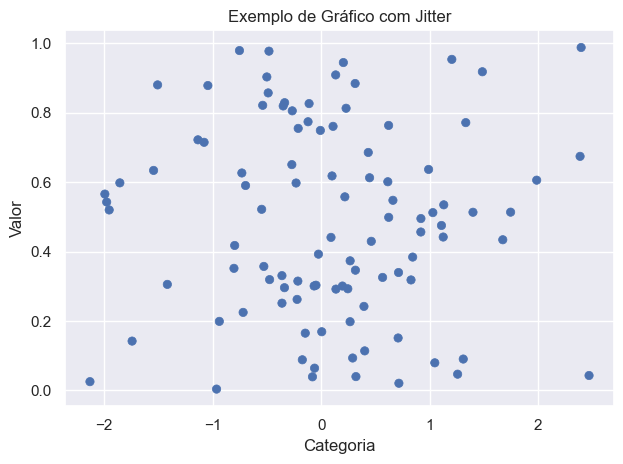

In [181]:
import seaborn.objects as so
import pandas as pd
import numpy as np

# Criação de um exemplo de DataFrame
np.random.seed(10)
df = pd.DataFrame({
    'y_proba': y_pred_proba_v1,
    'x_random': np.random.randn(len(y_pred_proba_v1))
})

# Criação do gráfico com jitter
(
    so.Plot(df, x="x_random", y="y_proba")
    .add(so.Dot(), so.Jitter())
    .label(title="Exemplo de Gráfico com Jitter", x="Categoria", y="Valor")
    .show()
)


16217

In [ ]:
# modelo de criação de correlograma
dados = df[df.columns.tolist()]
mask = dados.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(dados.corr())

In [ ]:
def viz(col):
    print(df[col].value_counts())
    print(df[col].isnull().sum())